## 개념

**(1) p(X)와 X사이의 모델링**

**(2) 승산비(Odds)**

**(3) 훈련 및 비용 함수**

**(4) scikit-learn의 LogisticRegression**

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

body=pd.read_csv('../../dataset/bodyPerformance.csv')
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [2]:
body['gender'] = np.where(body['gender']=='M', 0, 1) #M(남자)이면 0, 아니면 1
body['class_1'] = np.where(body['class']=='A', 1, 0) #A면 1, 아니면 0
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,0
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,0
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,1
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0


In [3]:
from sklearn.model_selection import train_test_split

feature_columns = list(body.columns.difference(['class', 'class_1']))

feature_columns, body.columns

(['age',
  'body fat_%',
  'broad jump_cm',
  'diastolic',
  'gender',
  'gripForce',
  'height_cm',
  'sit and bend forward_cm',
  'sit-ups counts',
  'systolic',
  'weight_kg'],
 Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
        'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
        'broad jump_cm', 'class', 'class_1'],
       dtype='object'))

In [4]:
x = body[feature_columns]
y = body['class_1']


train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [5]:
from sklearn.linear_model import LogisticRegression

logR = LogisticRegression()
logR.fit(train_x, train_y)

LogisticRegression()

In [6]:
proba = pd.DataFrame(logR.predict_proba(train_x))
cs = logR.decision_function(train_x)

df = pd.concat([proba, pd.DataFrame(cs)], axis=1)
df.columns=['Not A', 'A', 'decision_function']
df.sort_values(['decision_function'], inplace=True)
df.reset_index(inplace=True, drop=True)

df

,Not A,A,decision_function
0,1.000000,1.333247e-08,-18.133064
1,1.000000,5.179729e-08,-16.775928
2,1.000000,8.049621e-08,-16.335056
3,1.000000,8.144340e-08,-16.323357
4,1.000000,1.125075e-07,-16.000246
...,...,...,...
9370,0.002238,9.977617e-01,6.099789
9371,0.001907,9.980927e-01,6.260180
9372,0.001803,9.981965e-01,6.316226
9373,0.000798,9.992020e-01,7.132655


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-n7p_6m19 because the default path (/config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


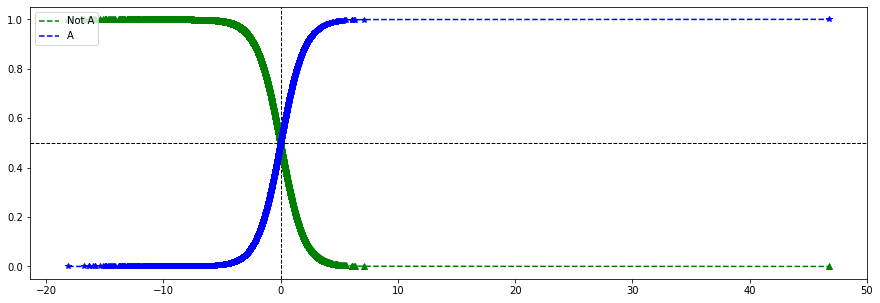

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

plt.axhline(y=0.5, linestyle='--', color='black', linewidth=1)
plt.axvline(x=0, linestyle='--', color='black', linewidth=1)

plt.plot(df['decision_function'], df['Not A'], 'g--', label='Not A')
plt.plot(df['decision_function'], df['Not A'], 'g^')
plt.plot(df['decision_function'], df['A'], 'b--', label='A')
plt.plot(df['decision_function'], df['A'], 'b*')

plt.xlabel
plt.ylabel

plt.legend(loc='upper left')

plt.show()

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = logR.predict(test_x)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_prc = precision_score(test_y, pred)
test_rcll = recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print('\n')
print(f'정확도:\t {round(test_acc * 100, 2)}')
print(f'정밀도:\t {round(test_prc * 100, 2)}')
print(f'재현율:\t {round(test_rcll * 100, 2)}')
print(f'F1:\t {round(test_f1 * 100, 2)}')

[[2764  250]
 [ 345  659]]


정확도:	 85.19
정밀도:	 72.5
재현율:	 65.64
F1:	 68.9


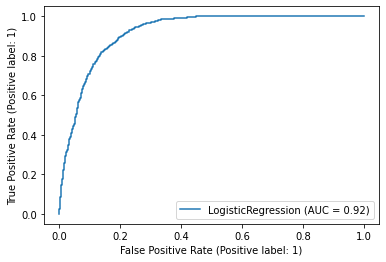

In [9]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(logR, test_x, test_y)
plt.show()

## 다중 클래스 분류 - 소프트맥스 회귀

In [10]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
body = pd.read_csv('../../dataset/bodyPerformance.csv')
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [11]:
body['gender'] = np.where(body['gender']=='M', 0, 1)
mapping={'A':0, 'B':1, 'C':2, 'D':4}
body['class_2'] = body['class'].map(mapping)

body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_2
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,2
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,4
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,4


In [12]:
from sklearn.model_selection import train_test_split

feature_columns = list(body.columns.difference(['class', 'class_2']))

x = body[feature_columns]
y = body['class_2']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [13]:
from sklearn.linear_model import LogisticRegression

softm = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softm.fit(train_x, train_y)

LogisticRegression(C=10, multi_class='multinomial')

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

pred = softm.predict(test_x)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)

print(test_cm)
print('\n')
print(f'정확도: {round(test_acc*100, 2)}')

[[707 261  36   0]
 [269 403 300  32]
 [ 92 207 525 181]
 [ 13  63 157 772]]


정확도: 59.91


In [15]:
softm.predict([test_x.iloc[-1, :]])

array([0])

In [16]:
softm.predict_proba([test_x.iloc[-1, :]])

array([[0.62639876, 0.3119005 , 0.06015628, 0.00154446]])